In [119]:
import numpy as np
from numpy import asarray

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

from PIL import Image

import tensorflow.compat.v1 as tf

print("TensorFlow version is ", tf.__version__)

from tensorflow import keras

print("keras version is ", keras.__version__)

from tensorflow.keras import backend as K

from tf_keras_vis import utils
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

TensorFlow version is  2.1.0
keras version is  2.2.4-tf


In [114]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [115]:
model = keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(5, activation='softmax')
])
model.load_weights("/Users/lucywang/Documents/Stanford/CS230Project/training224_0001Reg01FT2/cp.ckpt")
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_19  (None, 1280)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 2,230,277
Non-trainable params: 34,112
_________________________________________________________________


In [116]:
# Load image 
img1 = Image.open('/Users/lucywang/Documents/Stanford/CS230Project/data_preproc/test_images_pre/4/6d259b5b4c76.jpg')
img1 = img1.resize((224,224))
data = asarray(img1)
dataB = np.expand_dims(data, axis=0)
images = preprocess_input(dataB)

In [117]:
# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Saliency object
saliency = Saliency(model, model_modifier)

# Define loss function.
loss = lambda output: K.mean(output[:, 4])

# Generate saliency map
saliency_map = saliency(loss, images, smooth_samples=20)
saliency_map = normalize(saliency_map)

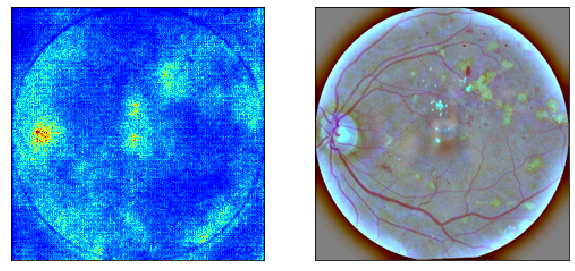

In [118]:
# Plot results
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(saliency_map[0], cmap='jet')
ax[1].imshow(data)
